In [1]:
import csv
import pandas as pd
from sklearn.preprocessing import  LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_care_center = pd.read_csv('Desktop/python Ex/프로젝트 연습/apartment/day_care_center.csv')
df_park = pd.read_csv('Desktop/python Ex/프로젝트 연습/apartment/park.csv')
df_submission = pd.read_csv('Desktop/python Ex/프로젝트 연습/apartment/submission.csv')

In [3]:
df_care_center.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7551 entries, 0 to 7550
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  7551 non-null   object 
 1   gu                    7551 non-null   object 
 2   day_care_name         7551 non-null   object 
 3   day_care_type         7551 non-null   object 
 4   day_care_baby_num     7551 non-null   int64  
 5   teacher_num           7326 non-null   float64
 6   nursing_room_num      4352 non-null   float64
 7   playground_num        3626 non-null   float64
 8   CCTV_num              5280 non-null   float64
 9   is_commuting_vehicle  7055 non-null   object 
 10  reference_date        7551 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 649.0+ KB


In [4]:
df_park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   city                         1359 non-null   object 
 1   gu                           1356 non-null   object 
 2   dong                         1359 non-null   object 
 3   park_name                    1359 non-null   object 
 4   park_type                    1359 non-null   object 
 5   park_area                    1359 non-null   float64
 6   park_exercise_facility       277 non-null    object 
 7   park_entertainment_facility  435 non-null    object 
 8   park_benefit_facility        266 non-null    object 
 9   park_cultural_facitiy        72 non-null     object 
 10  park_facility_other          175 non-null    object 
 11  park_open_year               937 non-null    float64
 12  reference_date               1359 non-null   object 
dtypes: float64(2), obj

In [5]:
df_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5463 entries, 0 to 5462
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   transaction_id          5463 non-null   int64
 1   transaction_real_price  5463 non-null   int64
dtypes: int64(2)
memory usage: 85.5 KB


In [6]:
df_care_center.city.value_counts()

서울특별시    5656
부산광역시    1895
Name: city, dtype: int64

In [7]:
df_park.city.value_counts()

서울특별시    930
부산광역시    429
Name: city, dtype: int64

In [8]:
train_df = pd.read_csv("Desktop/python Ex/프로젝트 연습/apartment/train.csv")
test_df = pd.read_csv("Desktop/python Ex/프로젝트 연습/apartment/test.csv")

In [9]:
# import re
# from tqdm import tqdm

# # 괄호와 괄호안내용 제거
# regex = "\(.*\)|\s-\s.*"
# for i in tqdm(range(len(train_df)), position=0, leave=True):
#    train_df['apt'][i] = re.sub(regex, '', train_df['apt'][i])

# # 처리시간이 길어서 과정을 생략하기 위해 따로 csv 파일 생성
# # 추후에 로드할 때는 train_df 대신 train_df_regex를 로드함(test도 마찬가지)
# train_df.to_csv('train_df_regex.csv', index=False)

In [10]:
# import re
# from tqdm import tqdm

# # 괄호와 괄호안내용 제거
# regex = "\(.*\)|\s-\s.*"
# for i in tqdm(range(len(test_df)), position=0, leave=True):
#    test_df['apt'][i] = re.sub(regex, '', test_df['apt'][i])

# # 처리시간이 길어서 과정을 생략하기 위해 따로 csv 파일 생성
# # 추후에 로드할 때는 test_df 대신 test_df_regex를 로드함
# test_df.to_csv('test_df_regex.csv', index=False)

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   dong                    1216553 non-null  object 
 4   jibun                   1216553 non-null  object 
 5   apt                     1216553 non-null  object 
 6   addr_kr                 1216553 non-null  object 
 7   exclusive_use_area      1216553 non-null  float64
 8   year_of_completion      1216553 non-null  int64  
 9   transaction_year_month  1216553 non-null  int64  
 10  transaction_date        1216553 non-null  object 
 11  floor                   1216553 non-null  int64  
 12  transaction_real_price  1216553 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 120.7+ M

In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5463 entries, 0 to 5462
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_id          5463 non-null   int64  
 1   apartment_id            5463 non-null   int64  
 2   city                    5463 non-null   object 
 3   dong                    5463 non-null   object 
 4   jibun                   5463 non-null   object 
 5   apt                     5463 non-null   object 
 6   addr_kr                 5463 non-null   object 
 7   exclusive_use_area      5463 non-null   float64
 8   year_of_completion      5463 non-null   int64  
 9   transaction_year_month  5463 non-null   int64  
 10  transaction_date        5463 non-null   object 
 11  floor                   5463 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 512.3+ KB


#### train_df, test_df 결측치 없음

In [13]:
train_df.apt.value_counts()[:20]

현대          13154
한신           9766
삼성           6729
대우           6216
신동아          5851
두산           5801
주공2          5669
삼성래미안        5483
우성           5411
벽산           4651
동원로얄듀크       4430
경남           4028
삼환           3896
쌍용           3409
롯데캐슬         3381
삼익           3362
대림           3238
오륙도에스케이뷰     3220
코오롱          3174
파크리오         3094
Name: apt, dtype: int64

In [14]:
train_df.shape

(1216553, 13)

In [15]:
train_df['apt_counts'] = 0
train_df.groupby('apt')['apt_counts'].count()
train_df = pd.merge(train_df, train_df.groupby('apt')['apt_counts'].count(), on='apt', how='left').drop('apt_counts_x',axis = 1).rename(columns={'apt_counts_y':'apt_counts'})


test_df['apt_counts'] = 0
test_df.groupby('apt')['apt_counts'].count()
test_df = pd.merge(test_df, test_df.groupby('apt')['apt_counts'].count(), on='apt', how='left').drop('apt_counts_x', axis=1).rename(columns={'apt_counts_y':'apt_counts'})

train_df.head(3)

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,apt_counts
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500,5
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000,1
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500,13


In [16]:
train_df.shape

(1216553, 14)

In [17]:
train_df['apt'].value_counts()[:10]

현대       13154
한신        9766
삼성        6729
대우        6216
신동아       5851
두산        5801
주공2       5669
삼성래미안     5483
우성        5411
벽산        4651
Name: apt, dtype: int64

In [18]:
train_df['top10'] = 0
test_df['top10'] = 0
top10 = ['자이', '푸르지오', '더샾', '롯데캐슬', '이편한|e편한|e-편한',
        '힐스테이트', '아이파크', '래미안', 'sk|SK|에스케이', '데시앙']

train_df['apt'] = train_df['apt'].fillna('others')
for i, brand in enumerate(top10):
    train_df.loc[train_df['apt'].str.contains(brand),'top10'] = 1
    test_df.loc[test_df['apt'].str.contains(brand),'top10'] = 1

In [19]:
train_df.head(1)

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,apt_counts,top10
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500,5,0


In [20]:
apt_names = ['그레이스', '양지', '쌍용', '현대', '한신', '삼성', '대우', '신동아', '두산', '주공',
             '우성', '벽산', '동원로얄듀크','경남', '삼환', '쌍용', '삼익', '대림', '코오롱', '파크리오',
             '엘지', '성원', '잠실', '동궁리치웰', '동성']
apt_names_list = top10 + apt_names

train_df['transformed'] = False
test_df['transformed'] = False

for a in apt_names_list:
    train_df.loc[train_df['apt'].str.contains(a), 'apt'] = a
    test_df.loc[test_df['apt'].str.contains(a), 'apt'] = a
    train_df.loc[train_df['apt'].str.contains(a), 'transformed'] = True
    test_df.loc[test_df['apt'].str.contains(a), 'transformed'] = True

#아파트 이름이 변경되지 않았을 경우 others로 변경
for a in apt_names:
    train_df.loc[~train_df['transformed'], 'apt'] = 'others'
    test_df.loc[~test_df['transformed'] , 'apt'] = 'others'

In [21]:
train_df['apt'].value_counts()

others          649780
현대               81824
주공               65937
래미안              35322
한신               27481
벽산               26968
롯데캐슬             24803
우성               24524
삼성               21055
두산               20691
푸르지오             19924
sk|SK|에스케이       19709
대우               18737
삼익               18708
쌍용               18256
대림               18194
이편한|e편한|e-편한     15567
신동아              14049
힐스테이트            12489
자이               11719
엘지               10938
경남               10875
코오롱               8765
아이파크              8625
성원                7697
삼환                6073
동원로얄듀크            6070
파크리오              3094
잠실                2606
데시앙               2327
동성                2228
양지                1033
그레이스               393
동궁리치웰               92
Name: apt, dtype: int64

In [22]:
print(train_df['apt'].nunique(), test_df['apt'].nunique())

34 34


In [23]:
# 아파트별 가격의 평균 내림차순 정렬, 라벨인코딩
all_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)
apt_price = all_df.groupby('apt')['transaction_real_price'].agg('mean').sort_values(ascending=False)
print('변환전\n', apt_price[:5])

for i, a in enumerate(list(apt_price.index)):
    all_df.loc[all_df['apt'] == a, 'apt'] = i
apt_price = all_df.groupby('apt')['transaction_real_price'].agg('mean').sort_values(ascending=False)
print('변환후\n', apt_price[:5])

변환전
 apt
잠실      91273.525326
파크리오    88739.646736
자이      79838.112467
래미안     63231.332512
아이파크    62427.703884
Name: transaction_real_price, dtype: float64
변환후
 apt
0    91273.525326
1    88739.646736
2    79838.112467
3    63231.332512
4    62427.703884
Name: transaction_real_price, dtype: float64


In [24]:
# 완공연도에서 최소연도를 뺌으로써 완공연도 라벨인코딩
print('변환전\n', all_df['year_of_completion'].unique()[:5])
all_df['year_of_completion'] = all_df['year_of_completion'] - all_df['year_of_completion'].min()
print('변환후\n', all_df['year_of_completion'].unique()[:5])
# 연월 증가하는 순으로 라벨 인코딩
print('변환전\n', all_df['transaction_year_month'].unique()[:5])
le = LabelEncoder()
all_df['transaction_year_month'] = le.fit_transform(all_df['transaction_year_month'])
print('변환후\n', all_df['transaction_year_month'].unique()[:5])
# 필요없는 열 제거
all_df = all_df.drop(['jibun', 'transaction_date', 'addr_kr'], axis=1)

변환전
 [2002 1973 2007 2003 2004]
변환후
 [41 12 46 42 43]
변환전
 [200801 200802 200803 200804 200805]
변환후
 [0 1 2 3 4]


In [25]:
all_df.head(5)

,transaction_id,apartment_id,city,dong,apt,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price,apt_counts,top10,transformed
0,0,7622,서울특별시,신교동,22,84.82,41,0,2,37500.0,5,0,False
1,1,5399,서울특별시,필운동,22,99.17,12,0,6,20000.0,1,0,False
2,2,3578,서울특별시,필운동,22,84.74,46,0,6,38500.0,13,0,False
3,3,10957,서울특별시,내수동,22,146.39,42,0,15,118000.0,55,0,False
4,4,10639,서울특별시,내수동,22,194.43,43,0,3,120000.0,15,0,False


In [26]:
seoul_set = set(all_df.loc[all_df['city']=='서울특별시', 'dong'])
busan_set = set(all_df.loc[all_df['city']=='부산광역시', 'dong'])
same_dong = seoul_set & busan_set 
print(same_dong)

{'부암동', '송정동', '사직동', '중동'}


In [27]:
for d in same_dong:
    all_df.loc[(all_df['city']=='서울특별시') & (all_df['dong']==d), 'dong'] = '서울' + d
    all_df.loc[(all_df['city']=='부산광역시') & (all_df['dong']==d), 'dong'] = '부산' + d

seoul_set = set(all_df.loc[all_df['city']=='서울특별시', 'dong'])
busan_set = set(all_df.loc[all_df['city']=='부산광역시', 'dong'])
same_dong = seoul_set & busan_set
print(same_dong)  

set()


In [28]:
train_df.loc[train_df['dong'].str.contains('장충동')].groupby('dong')['transaction_real_price'].\
agg('mean')

dong
장충동1가    269888.888889
장충동2가      6628.421053
Name: transaction_real_price, dtype: float64

In [29]:
dong_price = all_df.groupby('dong')['transaction_real_price'].agg('mean').sort_values(ascending=False)
dong_price[:41]

dong
장충동1가     269888.888889
압구정동      164534.722914
청암동       161403.700000
용산동5가     153497.331633
회현동2가     139906.140351
반포동       132489.395651
한남동       122593.293264
서빙고동      116547.239777
대치동       116320.538909
남대문로5가    113153.604651
도곡동       110655.655354
청담동       110289.411168
교남동       108600.000000
내수동       107899.014778
주성동       106000.000000
하중동       105900.477833
삼성동       101379.971621
잠실동       101166.337275
동자동        99472.876033
동빙고동       99057.552239
회현동1가      98753.660066
한강로3가      96027.903297
여의도동       93456.214326
서울사직동      93144.310145
이촌동        89409.952902
서교동        88442.874302
견지동        87004.741935
잠원동        86980.647308
방배동        85883.661956
신천동        85334.022796
신계동        84490.522184
자곡동        83905.484615
서초동        83858.755537
한강로1가      82761.069620
원효로1가      81194.484429
방이동        80720.686653
내곡동        79034.412121
상수동        77964.221557
일원동        77417.897626
상왕십리동      77258.186364
신원동        77225.606936
Name: trans

In [30]:
# 가격기준으로 동을 정렬한 리스트를 바탕으로 dong에 대해 라벨 인코딩 진행
for i, d in enumerate(list(dong_price.index)):
    all_df.loc[all_df['dong'] == d, 'dong'] = i
all_df.head()

,transaction_id,apartment_id,city,dong,apt,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price,apt_counts,top10,transformed
0,0,7622,서울특별시,138,22,84.82,41,0,2,37500.0,5,0,False
1,1,5399,서울특별시,65,22,99.17,12,0,6,20000.0,1,0,False
2,2,3578,서울특별시,65,22,84.74,46,0,6,38500.0,13,0,False
3,3,10957,서울특별시,13,22,146.39,42,0,15,118000.0,55,0,False
4,4,10639,서울특별시,13,22,194.43,43,0,3,120000.0,15,0,False


In [31]:
all_df.describe()

,transaction_id,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price,apt_counts,top10
count,1.222016e+06,1.222016e+06,1.222016e+06,1.222016e+06,1.222016e+06,1.222016e+06,1.216553e+06,1.222016e+06,1.222016e+06
mean,6.116474e+05,6.299630e+03,7.817144e+01,3.730611e+01,6.461461e+01,9.338479e+00,3.822769e+04,1.165050e+03,1.236833e-01
std,3.538049e+05,3.581363e+03,2.916926e+01,8.947398e+00,3.519266e+01,6.604638e+00,3.104898e+04,1.930563e+03,3.292201e-01
min,0.000000e+00,0.000000e+00,9.260000e+00,0.000000e+00,0.000000e+00,-4.000000e+00,1.000000e+02,1.000000e+00,0.000000e+00
25%,3.055038e+05,3.345000e+03,5.976000e+01,3.200000e+01,3.300000e+01,4.000000e+00,1.900000e+04,1.890000e+02,0.000000e+00
50%,6.110075e+05,5.964000e+03,8.240000e+01,3.800000e+01,7.200000e+01,8.000000e+00,3.090000e+04,5.530000e+02,0.000000e+00
75%,9.165112e+05,9.436000e+03,8.497000e+01,4.400000e+01,9.400000e+01,1.300000e+01,4.700000e+04,1.207000e+03,0.000000e+00
max,1.234930e+06,1.265800e+04,4.243200e+02,5.600000e+01,1.190000e+02,8.000000e+01,8.200000e+05,1.315400e+04,1.000000e+00


In [32]:
# 최소값이 -4이므로 4를 더해서 음수를 없애고 순서형범주처리
print('변환전\n', all_df['floor'].values[:5])
all_df['floor'] = all_df['floor'].map(lambda x: x+4)
print('변환후\n', all_df['floor'].values[:5])

변환전
 [ 2  6  6 15  3]
변환후
 [ 6 10 10 19  7]


In [33]:
all_df.describe()

,transaction_id,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price,apt_counts,top10
count,1.222016e+06,1.222016e+06,1.222016e+06,1.222016e+06,1.222016e+06,1.222016e+06,1.216553e+06,1.222016e+06,1.222016e+06
mean,6.116474e+05,6.299630e+03,7.817144e+01,3.730611e+01,6.461461e+01,1.333848e+01,3.822769e+04,1.165050e+03,1.236833e-01
std,3.538049e+05,3.581363e+03,2.916926e+01,8.947398e+00,3.519266e+01,6.604638e+00,3.104898e+04,1.930563e+03,3.292201e-01
min,0.000000e+00,0.000000e+00,9.260000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+02,1.000000e+00,0.000000e+00
25%,3.055038e+05,3.345000e+03,5.976000e+01,3.200000e+01,3.300000e+01,8.000000e+00,1.900000e+04,1.890000e+02,0.000000e+00
50%,6.110075e+05,5.964000e+03,8.240000e+01,3.800000e+01,7.200000e+01,1.200000e+01,3.090000e+04,5.530000e+02,0.000000e+00
75%,9.165112e+05,9.436000e+03,8.497000e+01,4.400000e+01,9.400000e+01,1.700000e+01,4.700000e+04,1.207000e+03,0.000000e+00
max,1.234930e+06,1.265800e+04,4.243200e+02,5.600000e+01,1.190000e+02,8.400000e+01,8.200000e+05,1.315400e+04,1.000000e+00


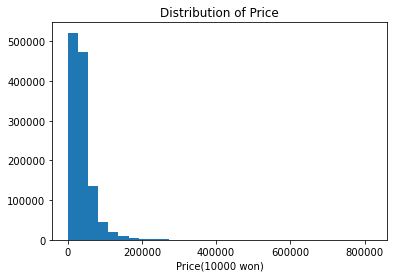

In [34]:
# train price
plt.figure()
plt.hist(train_df['transaction_real_price'], bins=30)
plt.xlabel('Price(10000 won)')
plt.title('Distribution of Price')
plt.show()

In [35]:
# 가격 로그 변환 후 원래 가격 따로 저장
all_df['log_price'] = np.log1p(all_df['transaction_real_price'])
real_price = all_df['transaction_real_price'] # 원래 가격
#train_y = real_price[:train_df.shape[0]] # train 데이터의 가격
#test_y = real_price[train_df.shape[0]:] # test 데이터의 가격
all_df.drop('transaction_real_price', axis=1, inplace=True)
all_df.head(1)

,transaction_id,apartment_id,city,dong,apt,exclusive_use_area,year_of_completion,transaction_year_month,floor,apt_counts,top10,transformed,log_price
0,0,7622,서울특별시,138,22,84.82,41,0,6,5,0,False,10.532123


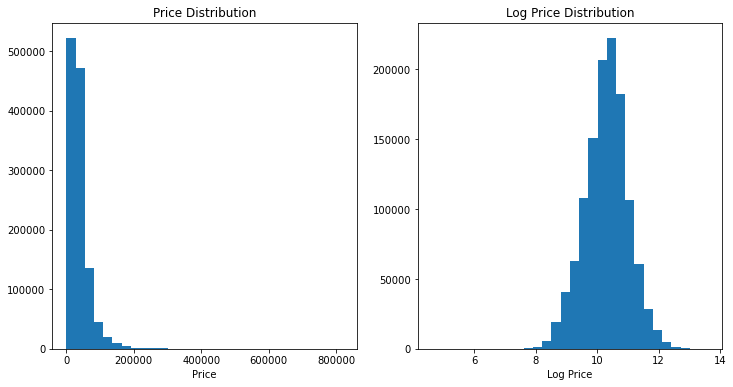

In [36]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))

ax1.hist(train_df['transaction_real_price'], bins=30)
ax1.set_title('Price Distribution')
ax1.set_xlabel('Price')

ax2.hist(np.log1p(train_df['transaction_real_price']), bins=30)
ax2.set_title('Log Price Distribution')
ax2.set_xlabel('Log Price')

plt.show()

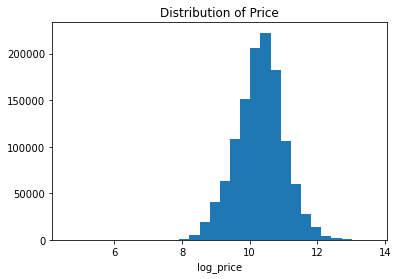

In [37]:
# train price
plt.figure()
plt.hist(all_df['log_price'], bins=30)
plt.xlabel('log_price')
plt.title('Distribution of Price')
plt.show()

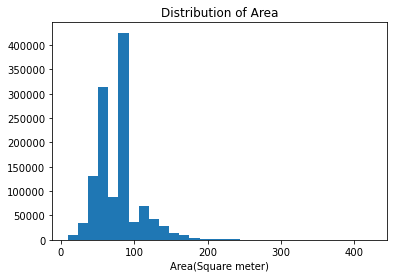

In [38]:
# train area
plt.figure()
plt.hist(train_df['exclusive_use_area'], bins=30)
plt.xlabel('Area(Square meter)')
plt.title('Distribution of Area')
plt.show()

In [39]:
# 면적 로그 변환 후 원래 면적 따로 저장
all_df['log_area'] = np.log1p(all_df['exclusive_use_area'])
area = all_df['exclusive_use_area'] # 원래 가격
all_df.drop('exclusive_use_area', axis=1, inplace=True)
all_df.head(1)

,transaction_id,apartment_id,city,dong,apt,year_of_completion,transaction_year_month,floor,apt_counts,top10,transformed,log_price,log_area
0,0,7622,서울특별시,138,22,41,0,6,5,0,False,10.532123,4.452252


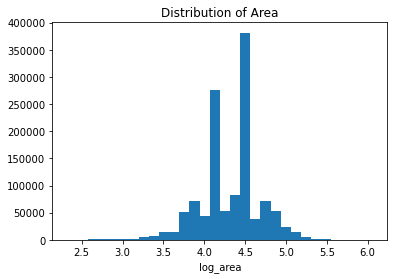

In [40]:
plt.figure()
plt.hist(all_df['log_area'], bins=30)
plt.xlabel('log_area')
plt.title('Distribution of Area')
plt.show()

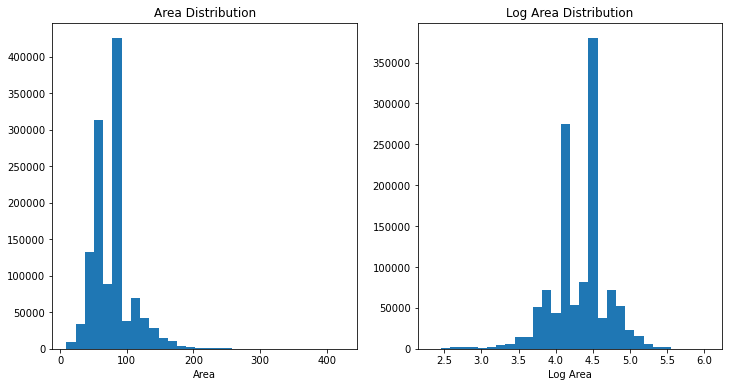

In [41]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(12,6))

ax1.hist(train_df['exclusive_use_area'], bins=30)
ax1.set_title('Area Distribution')
ax1.set_xlabel('Area')

ax2.hist(np.log1p(train_df['exclusive_use_area']), bins=30)
ax2.set_title('Log Area Distribution')
ax2.set_xlabel('Log Area')

plt.show()

In [42]:
ohe_col = ['city']
drop_col = ['transaction_id', 'apartment_id', 'city', 'apt_counts', 'transformed']

ohe_columns = pd.get_dummies(all_df[ohe_col])

In [43]:
all_df.head(1)

,transaction_id,apartment_id,city,dong,apt,year_of_completion,transaction_year_month,floor,apt_counts,top10,transformed,log_price,log_area
0,0,7622,서울특별시,138,22,41,0,6,5,0,False,10.532123,4.452252


In [44]:
all_df = pd.concat([all_df.drop(drop_col, axis=1), ohe_columns], axis=1)
all_df.head()

,dong,apt,year_of_completion,transaction_year_month,floor,top10,log_price,log_area,city_부산광역시,city_서울특별시
0,138,22,41,0,6,0,10.532123,4.452252,0,1
1,65,22,12,0,10,0,9.903538,4.606869,0,1
2,65,22,46,0,10,0,10.558439,4.451319,0,1
3,13,22,42,0,19,0,11.678448,4.993082,0,1
4,13,22,43,0,7,0,11.695255,5.275202,0,1


In [45]:
all_df.shape

(1222016, 10)

In [46]:
# all_df.to_csv('Desktop/python Ex/프로젝트 연습/apartment/all_df.csv', index=False)

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
!pip install xgboost
from tqdm import tqdm
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso,  Ridge 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [48]:
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso,  Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import KFold, cross_val_score, train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_squared_error
!pip install lightgbm
import lightgbm as lgb

In [49]:
import matplotlib as mpl
import matplotlib.font_manager as fm
font_name = fm.FontProperties(size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

DejaVu Sans


In [72]:
!pip install optuna
import optuna
from optuna.integration import XGBoostPruningCallback
# from sklearn.externals import joblib
import pickle

import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm

In [50]:
PATH = 'Desktop/python Ex/프로젝트 연습/apartment/'
train_df = pd.read_csv(PATH + 'train_df_regex.csv')
all_df = pd.read_csv(PATH + 'all_df.csv')
all_df = all_df.drop('apt', axis=1)

In [51]:
all_df.head(3)

,dong,year_of_completion,transaction_year_month,floor,top10,log_price,log_area,city_부산광역시,city_서울특별시
0,138,41,0,6,0,10.532123,4.452252,0,1
1,65,12,0,10,0,9.903538,4.606869,0,1
2,65,46,0,10,0,10.558439,4.451319,0,1


In [52]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1222016 entries, 0 to 1222015
Data columns (total 9 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   dong                    1222016 non-null  int64  
 1   year_of_completion      1222016 non-null  int64  
 2   transaction_year_month  1222016 non-null  int64  
 3   floor                   1222016 non-null  int64  
 4   top10                   1222016 non-null  int64  
 5   log_price               1216553 non-null  float64
 6   log_area                1222016 non-null  float64
 7   city_부산광역시              1222016 non-null  int64  
 8   city_서울특별시              1222016 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 83.9 MB


In [53]:
all_df.describe()

,dong,year_of_completion,transaction_year_month,floor,top10,log_price,log_area,city_부산광역시,city_서울특별시
count,1.222016e+06,1.222016e+06,1.222016e+06,1.222016e+06,1.222016e+06,1.216553e+06,1.222016e+06,1.222016e+06,1.222016e+06
mean,2.407773e+02,3.730611e+01,6.461461e+01,1.333848e+01,1.236833e-01,1.030509e+01,4.306129e+00,3.893730e-01,6.106270e-01
std,1.267679e+02,8.947398e+00,3.519266e+01,6.604638e+00,3.292201e-01,7.054740e-01,3.688630e-01,4.876083e-01,4.876083e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.615121e+00,2.328253e+00,0.000000e+00,0.000000e+00
25%,1.300000e+02,3.200000e+01,3.300000e+01,8.000000e+00,0.000000e+00,9.852247e+00,4.106932e+00,0.000000e+00,0.000000e+00
50%,2.580000e+02,3.800000e+01,7.200000e+01,1.200000e+01,0.000000e+00,1.033854e+01,4.423648e+00,0.000000e+00,1.000000e+00
75%,3.380000e+02,4.400000e+01,9.400000e+01,1.700000e+01,0.000000e+00,1.075792e+01,4.453998e+00,1.000000e+00,1.000000e+00
max,4.760000e+02,5.600000e+01,1.190000e+02,8.400000e+01,1.000000e+00,1.361706e+01,6.052842e+00,1.000000e+00,1.000000e+00


In [54]:
train_df = all_df[:train_df.shape[0]]
train_y = train_df['log_price']
train_X = train_df.drop('log_price', axis=1)
test_df = all_df[train_df.shape[0]:].drop('log_price', axis=1)
print(train_df.shape, test_df.shape, train_X.shape, train_y.shape)

(1216553, 9) (5463, 8) (1216553, 8) (1216553,)


In [55]:
train_X.head(1)

,dong,year_of_completion,transaction_year_month,floor,top10,log_area,city_부산광역시,city_서울특별시
0,138,41,0,6,0,4.452252,0,1


In [56]:
train_y.head(1)

0    10.532123
Name: log_price, dtype: float64

In [57]:
train_df.head(1)

,dong,year_of_completion,transaction_year_month,floor,top10,log_price,log_area,city_부산광역시,city_서울특별시
0,138,41,0,6,0,10.532123,4.452252,0,1


In [58]:
test_df.head(1)

,dong,year_of_completion,transaction_year_month,floor,top10,log_area,city_부산광역시,city_서울특별시
1216553,51,41,118,6,0,3.598681,0,1


In [59]:
reg = LinearRegression().fit(train_X, train_y)
reg.score(train_X, train_y) #R^2

0.848786311872933

C:\Users\jeong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jeong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jeong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jeong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50669 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jeong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jeong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49436 missing from c

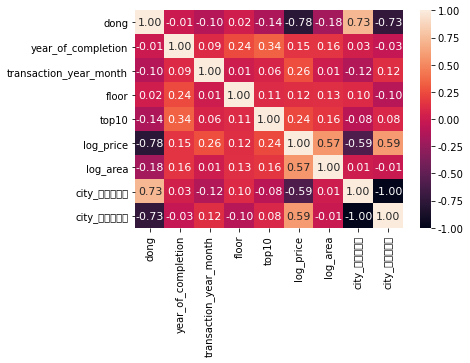

In [60]:
sns.heatmap(train_df.corr(), annot=True, fmt='.2f', annot_kws={"fontsize":11})
plt.show()

In [61]:
def RMSE(y, y_pred):
    rmse = mean_squared_error(y, y_pred) ** 0.5
    return rmse

def rmse_cv(model):
    tscv = TimeSeriesSplit(n_splits=10)
    rmse_list = []
    for i, (train_index, test_index) in enumerate(tscv.split(train_X), start=1):
        X_train, X_test = train_X.iloc[train_index], train_X.iloc[test_index]
        y_train, y_test = train_y.iloc[train_index], train_y.iloc[test_index]
        clf = model.fit(X_train, y_train)
        pred = clf.predict(X_test)
        rmse = RMSE(y_test, pred) 
        rmse_list.append(rmse)
    return type(model).__name__, rmse_list

def print_rmse_score(model):
    model_name, score = rmse_cv(model)
    for i, r in tqdm(enumerate(score, start=1), leave=True):
        if i == 1:
            print('\n')
            print(f'{i} FOLDS: {model_name} RMSLE: {r:.4f}')
        else:
            print(f'{i} FOLDS: {model_name} RMSLE: {r:.4f}')
    print(f'\n{model_name} mean RMSLE: {np.mean(score):.4f}')
    print('='*40)

In [62]:
ridge = Ridge(alpha=0.8, random_state=1)
lasso = Lasso(alpha = 0.01, random_state=1)
Enet = ElasticNet(alpha=0.03, l1_ratio=0.01, random_state=1)


DTree = DecisionTreeRegressor(max_depth=6, min_samples_split=10, min_samples_leaf=15, random_state=1)
rf = RandomForestRegressor(n_estimators=500, criterion='mse', max_depth=9, min_samples_split=50,
                           min_samples_leaf=5, random_state=1)
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05,
                             max_depth=3, min_child_weight=1.7817, n_estimators=1000,
                             reg_alpha=0.4640, reg_lambda=0.8571, subsample=0.5213,
                             silent=1, random_state=1, nthread=-1)
model_lgb = lgb.LGBMRegressor(objective='regression', num_leaves=5, learning_rate=0.05, 
                              n_estimators=720, max_bin=55, bagging_fraction=0.8,
                              bagging_freq=5, feature_fraction=0.2319, feature_fraction_seed=9,
                              bagging_seed=9, min_data_in_leaf=6, min_sum_hessian_in_leaf=11)

In [63]:
score = []
for model in [reg, ridge, lasso, Enet, DTree]:
    print_rmse_score(model)

10it [00:00, ?it/s]




1 FOLDS: LinearRegression RMSLE: 0.1979
2 FOLDS: LinearRegression RMSLE: 0.2518
3 FOLDS: LinearRegression RMSLE: 0.2156
4 FOLDS: LinearRegression RMSLE: 0.3588
5 FOLDS: LinearRegression RMSLE: 0.3424
6 FOLDS: LinearRegression RMSLE: 0.3486
7 FOLDS: LinearRegression RMSLE: 0.3403
8 FOLDS: LinearRegression RMSLE: 0.2936
9 FOLDS: LinearRegression RMSLE: 0.2625
10 FOLDS: LinearRegression RMSLE: 0.2855

LinearRegression mean RMSLE: 0.2897


10it [00:00, 10019.84it/s]




1 FOLDS: Ridge RMSLE: 0.1979
2 FOLDS: Ridge RMSLE: 0.2518
3 FOLDS: Ridge RMSLE: 0.2156
4 FOLDS: Ridge RMSLE: 0.3588
5 FOLDS: Ridge RMSLE: 0.3424
6 FOLDS: Ridge RMSLE: 0.3486
7 FOLDS: Ridge RMSLE: 0.3403
8 FOLDS: Ridge RMSLE: 0.2936
9 FOLDS: Ridge RMSLE: 0.2625
10 FOLDS: Ridge RMSLE: 0.2855

Ridge mean RMSLE: 0.2897


10it [00:00, 10022.23it/s]




1 FOLDS: Lasso RMSLE: 0.2009
2 FOLDS: Lasso RMSLE: 0.2531
3 FOLDS: Lasso RMSLE: 0.2211
4 FOLDS: Lasso RMSLE: 0.3641
5 FOLDS: Lasso RMSLE: 0.3362
6 FOLDS: Lasso RMSLE: 0.4171
7 FOLDS: Lasso RMSLE: 0.3593
8 FOLDS: Lasso RMSLE: 0.3063
9 FOLDS: Lasso RMSLE: 0.2648
10 FOLDS: Lasso RMSLE: 0.2799

Lasso mean RMSLE: 0.3003


10it [00:00, ?it/s]




1 FOLDS: ElasticNet RMSLE: 0.2076
2 FOLDS: ElasticNet RMSLE: 0.2539
3 FOLDS: ElasticNet RMSLE: 0.2201
4 FOLDS: ElasticNet RMSLE: 0.3680
5 FOLDS: ElasticNet RMSLE: 0.3339
6 FOLDS: ElasticNet RMSLE: 0.3696
7 FOLDS: ElasticNet RMSLE: 0.3585
8 FOLDS: ElasticNet RMSLE: 0.3068
9 FOLDS: ElasticNet RMSLE: 0.2687
10 FOLDS: ElasticNet RMSLE: 0.2809

ElasticNet mean RMSLE: 0.2968


10it [00:00, 9761.01it/s]



1 FOLDS: DecisionTreeRegressor RMSLE: 0.1887
2 FOLDS: DecisionTreeRegressor RMSLE: 0.2715
3 FOLDS: DecisionTreeRegressor RMSLE: 0.2205
4 FOLDS: DecisionTreeRegressor RMSLE: 0.3595
5 FOLDS: DecisionTreeRegressor RMSLE: 0.3875
6 FOLDS: DecisionTreeRegressor RMSLE: 0.3512
7 FOLDS: DecisionTreeRegressor RMSLE: 0.3717
8 FOLDS: DecisionTreeRegressor RMSLE: 0.3129
9 FOLDS: DecisionTreeRegressor RMSLE: 0.3112
10 FOLDS: DecisionTreeRegressor RMSLE: 0.3357

DecisionTreeRegressor mean RMSLE: 0.3111


In [64]:
for model in [rf, model_xgb, model_lgb]:
    print_rmse_score(model)

10it [00:00, 5013.51it/s]




1 FOLDS: RandomForestRegressor RMSLE: 0.1746
2 FOLDS: RandomForestRegressor RMSLE: 0.2500
3 FOLDS: RandomForestRegressor RMSLE: 0.2113
4 FOLDS: RandomForestRegressor RMSLE: 0.3609
5 FOLDS: RandomForestRegressor RMSLE: 0.3663
6 FOLDS: RandomForestRegressor RMSLE: 0.2971
7 FOLDS: RandomForestRegressor RMSLE: 0.3204
8 FOLDS: RandomForestRegressor RMSLE: 0.2691
9 FOLDS: RandomForestRegressor RMSLE: 0.2733
10 FOLDS: RandomForestRegressor RMSLE: 0.2517

RandomForestRegressor mean RMSLE: 0.2775
[10:19:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:20:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "si

10it [00:00, ?it/s]




1 FOLDS: XGBRegressor RMSLE: 0.1873
2 FOLDS: XGBRegressor RMSLE: 0.2248
3 FOLDS: XGBRegressor RMSLE: 0.1952
4 FOLDS: XGBRegressor RMSLE: 0.3217
5 FOLDS: XGBRegressor RMSLE: 0.3440
6 FOLDS: XGBRegressor RMSLE: 0.2501
7 FOLDS: XGBRegressor RMSLE: 0.2564
8 FOLDS: XGBRegressor RMSLE: 0.2157
9 FOLDS: XGBRegressor RMSLE: 0.2426
10 FOLDS: XGBRegressor RMSLE: 0.1903

XGBRegressor mean RMSLE: 0.2428
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: baggin

10it [00:00, 10027.02it/s]



1 FOLDS: LGBMRegressor RMSLE: 0.3331
2 FOLDS: LGBMRegressor RMSLE: 0.3571
3 FOLDS: LGBMRegressor RMSLE: 0.3265
4 FOLDS: LGBMRegressor RMSLE: 0.4505
5 FOLDS: LGBMRegressor RMSLE: 0.3757
6 FOLDS: LGBMRegressor RMSLE: 0.2558
7 FOLDS: LGBMRegressor RMSLE: 0.2722
8 FOLDS: LGBMRegressor RMSLE: 0.2381
9 FOLDS: LGBMRegressor RMSLE: 0.2240
10 FOLDS: LGBMRegressor RMSLE: 0.2132

LGBMRegressor mean RMSLE: 0.3046


In [65]:
score = [0.2888, 0.2888, 0.2990, 0.2960, 0.3102, 0.2749, 0.2390, 0.2419]
model = ['Linear Regression', 'Ridge', 'Lasso', "ElasticNet", 'DecisionTree','RandomForest', 'XGBoost', 'LightGBM']

result_df = pd.DataFrame({'Model': model, 'Score': score}).sort_values(by='Score', ascending=True).reset_index(drop=True)
result_df.head(8)

,Model,Score
0,XGBoost,0.2390
1,LightGBM,0.2419
2,RandomForest,0.2749
3,Linear Regression,0.2888
4,Ridge,0.2888
5,ElasticNet,0.2960
6,Lasso,0.2990
7,DecisionTree,0.3102


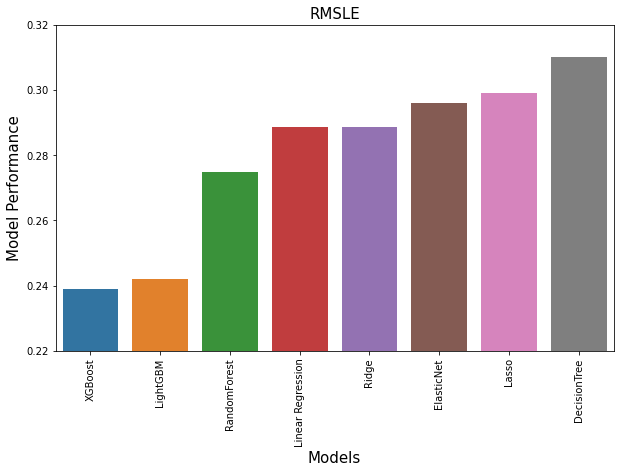

In [66]:
f, ax = plt.subplots(figsize=(10, 6))
plt.xticks(rotation='90')
sns.barplot(x=result_df['Model'], y=result_df['Score'])
plt.xlabel('Models', fontsize=15)
plt.ylabel('Model Performance', fontsize=15)
plt.ylim(0.22, 0.32)
plt.title('RMSLE', fontsize=15)
plt.show()

In [67]:
cut = int(len(train_df)*0.8)
h_train = train_df[:cut]
h_valid = train_df[cut:]

h_train_X = h_train.drop('log_price', axis=1)
h_train_y = h_train['log_price']
h_valid_X = h_valid.drop('log_price', axis=1)
h_valid_y = h_valid['log_price']
print(h_train_X.shape, h_train_y.shape, h_valid_X.shape, h_valid_y.shape)

(973242, 8) (973242,) (243311, 8) (243311,)


In [68]:
h_train_X.head()

,dong,year_of_completion,transaction_year_month,floor,top10,log_area,city_부산광역시,city_서울특별시
0,138,41,0,6,0,4.452252,0,1
1,65,12,0,10,0,4.606869,0,1
2,65,46,0,10,0,4.451319,0,1
3,13,42,0,19,0,4.993082,0,1
4,13,43,0,7,0,5.275202,0,1


In [73]:
from optuna.samplers import TPESampler

sampler = TPESampler(seed=10)
n_repeats=3

def objective(trial):
    dtrain = xgb.DMatrix(h_train_X, label=h_train_y)
    dtest = xgb.DMatrix(h_valid_X, label=h_valid_y)

    param = {
        'objective': 'reg:squarederror', # 회귀
         'eval_metric': 'rmse',
         "xgb_gpu_hist": 1,
         'verbosity': 0,
         'booster': 'gbtree', # gradient boosting decision tree
         'lambda': trial.suggest_loguniform('lambda', 1e-8, 1),
         'alpha': trial.suggest_loguniform('alpha', 1e-8, 1),
         'max_depth': trial.suggest_int('max_depth',3, 9),
         'learning_rate': 0.01,
         "eta": trial.suggest_loguniform("eta", 1e-8, 1.0),
         "gamma": trial.suggest_loguniform("gamma", 1e-8, 1.0),
         'n_estimators': trial.suggest_int('n_estimators', 700, 1500),
         'min_child_weight': trial.suggest_int('min_child_weight', 0, 10),
         'subsample': trial.suggest_loguniform('subsample', 0.4, 1)
    }

    model = xgb.XGBRegressor(**param)
    pruning_callback = XGBoostPruningCallback(trial, "validation_0-rmse")
    xgb_2 = model.fit(h_train_X, h_train_y, eval_set=[(h_valid_X, h_valid_y)], verbose=0,
                      eval_metric='rmse', callbacks=[pruning_callback])

    rmse = RMSE(h_valid_y, xgb_2.predict(h_valid_X))
    return rmse
        
study_xgb = optuna.create_study(direction='minimize', sampler=sampler)
study_xgb.optimize(objective, n_trials=50)

[I 2021-08-24 11:26:51,941] A new study created in memory with name: no-name-fd82e79d-52cf-487c-b1d9-bd4215bbfdd3
[I 2021-08-24 11:33:34,391] Trial 0 finished with value: 0.20771652355879144 and parameters: {'lambda': 0.014810344004555135, 'alpha': 1.4656004675652718e-08, 'max_depth': 7, 'eta': 0.00978207662259244, 'gamma': 9.728728830009641e-05, 'n_estimators': 880, 'min_child_weight': 2, 'subsample': 0.8029815922829752}. Best is trial 0 with value: 0.20771652355879144.
[I 2021-08-24 11:42:15,988] Trial 1 finished with value: 0.2053248667240162 and parameters: {'lambda': 2.2536511574969237e-07, 'alpha': 5.090008568091192e-08, 'max_depth': 7, 'eta': 0.4237861601304585, 'gamma': 1.075439863800637e-08, 'n_estimators': 1110, 'min_child_weight': 8, 'subsample': 0.7011462565718398}. Best is trial 1 with value: 0.2053248667240162.
[I 2021-08-24 11:50:38,394] Trial 2 finished with value: 0.20265578409381638 and parameters: {'lambda': 0.005943503728075847, 'alpha': 2.1627610787257848e-06, 'max

In [74]:
print('Best Trial: score {},\nparams {}'.format(study_xgb.best_trial.value, study_xgb.best_trial.params))

Best Trial: score 0.19792948723041381,
params {'lambda': 0.007109403340426568, 'alpha': 1.945202794297081e-07, 'max_depth': 9, 'eta': 4.0448626776083755e-05, 'gamma': 0.011277809763858207, 'n_estimators': 1500, 'min_child_weight': 5, 'subsample': 0.7428653884727844}


In [ ]:
# optuna.visualization.plot_param_importances(study_xgb)

In [76]:
trial = study_xgb.best_trial
xgb_params = trial.params
xgb_params

{'lambda': 0.007109403340426568,
 'alpha': 1.945202794297081e-07,
 'max_depth': 9,
 'eta': 4.0448626776083755e-05,
 'gamma': 0.011277809763858207,
 'n_estimators': 1500,
 'min_child_weight': 5,
 'subsample': 0.7428653884727844}

In [77]:
final_xgb_model = xgb.XGBRegressor(**xgb_params)
final_xgb_model.fit(train_X, train_y, eval_metric='rmse')
final_xgb_pred = final_xgb_model.predict(test_df)

In [78]:
final_xgb_pred

array([1.0711455, 1.0316119, 1.0377922, ..., 1.1092218, 1.0967462,
       1.0426908], dtype=float32)

<BarContainer object of 8 artists>

C:\Users\jeong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jeong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49328 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jeong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44305 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jeong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50669 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jeong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\jeong\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49436 missing from c

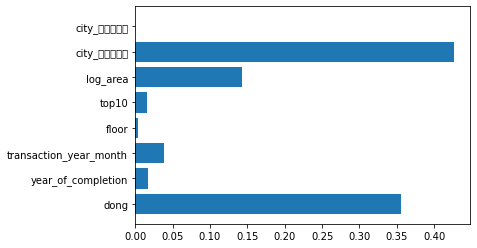

In [79]:
plt.barh(train_X.columns, final_xgb_model.feature_importances_)

In [80]:
final_pred_sub = np.expm1(final_xgb_pred)
final_pred_sub

array([1.9187212, 1.8055847, 1.8229775, ..., 2.031998 , 1.9944069,
       1.8368399], dtype=float32)

In [81]:
PATH = 'Desktop/python Ex/프로젝트 연습/apartment/'

In [82]:
sub = pd.read_csv(PATH + 'test.csv')
sub_df = pd.DataFrame({'transaction_id': sub['transaction_id'], 'transaction_real_price': final_pred_sub})
sub_df

,transaction_id,transaction_real_price
0,1145756,1.918721
1,1198704,1.805585
2,1222384,1.822978
3,1179897,2.251092
4,1223091,1.985127
...,...,...
5458,1174640,2.062218
5459,1175575,2.204731
5460,1157024,2.031998
5461,1136863,1.994407


In [83]:
sub_df.to_csv(PATH + 'submission_xgb_wo_apt2.csv', index=False)

In [84]:
o_train_df = pd.read_csv(PATH + 'train_df_regex.csv')
o_test_df = pd.read_csv(PATH + 'test_df_regex.csv')
o_train_df.head(1)

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현,신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
